Is er een relatie tussen de GDP van een land en zijn inkomen ongelijkheid (gini index (0=gelijkheid))?

**De correlatie over alle datapunten tussen de GDP en de gini index is -0.43. Als je de correlaties per land berekent, zit hierin een enorm verschil (van -.94 tot +.94). De standaardeviatie van de GDP's is ook nog eens heel hoog. Een scatterplot over alle data lijkt in eerste instantie een logaritmisch verband te tonen, maar per land is dit niet terug te vinden (aantal datapunten per land voor een goede analyse te laag). **


**Er valt op dat bij een hogere gini coefficient (meer ongelijkheid) de GDP in de lagere waarden valt (en de regressiecoefficient negatief is). En dat bij een lagere gini (max onder .3 per land) de GDP in de hogere waarden valt (en de regressiecoefficent positief is). Als je daadwerkelijk inzoomt op een groep (landen met max gini onder .3 en landen met max gini boven .45) en de correlatiecoefficent berekent is deze erg laag (eerte groep .12, tweede groep -.33)**

**Conclusie: een éénduidige relatie tussen de GDP van een land en de gini index is niet aan te geven. Per land zie je veel en grote verschillen. De algehele trend lijkt wel: als een land een hoge GDP heeft, heeft hij een lagere gini index (meer gelijkheid) en andersom. Maar de correlatiecoefficienten (en aantal datapunten) zijn te laag om deze trend te bevestigen.**

In [107]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

In [108]:
#gini index
url = "https://raw.githubusercontent.com/MBonnes/LocalGitDAP/main/notebook%20income%20inequality/economic-inequality-gini-index.csv"
df_gini = pd.read_csv(url)

#gdp per capita
url = "https://raw.githubusercontent.com/MBonnes/LocalGitDAP/main/notebook%20income%20inequality/gdp-per-capita-maddison-2020.csv"
df_gdp = pd.read_csv(url)

In [ ]:
df_gini.isnull().sum() #alleen 'Code' heeft NULL values
df_gdp.isnull().sum() #alleen 'Code heeft NULL values

In [110]:
#De 'Code' kolommen niet nodig voor de analyse en de kolom 417485-annotations ook niet:
df_gini.drop(columns = ["Code"],inplace=True)
df_gdp.drop(columns = ["Code","417485-annotations"],inplace=True)

In [111]:
#Entity = Country 
df_gini.rename(columns = {"Entity" : "Country"},inplace=True)
df_gdp.rename(columns = {"Entity" : "Country"},inplace=True)

In [ ]:
#we gaan er één dataframe van maken (zonder nulls):
df_gini_en_gdp = pd.merge(df_gini,df_gdp,on=["Country","Year"])
display(df_gini_en_gdp)

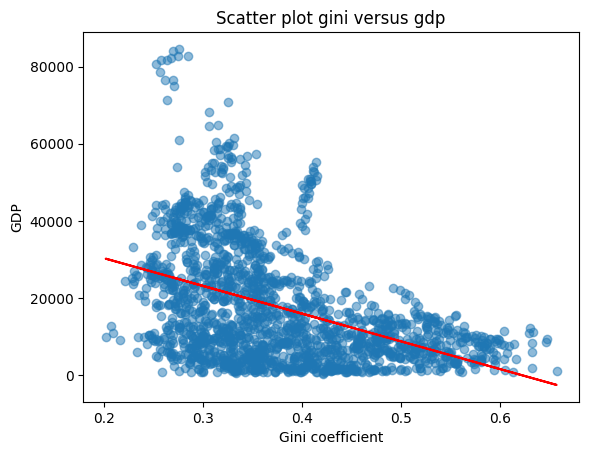

In [113]:
from scipy import stats

#Scatter chart gini - gdp + lineaire regressielijn
fig, ax = plt.subplots()
x = df_gini_en_gdp['Gini coefficient']
y = df_gini_en_gdp['GDP per capita']
ax.set_xlabel('Gini coefficient')
ax.set_ylabel("GDP")
ax.set_title('Scatter plot gini versus gdp')
plt.scatter(x, y, alpha=0.5)

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))

plt.plot(x, mymodel, c='r')


Aangezien er een kromming in de datapunten lijkt te zitten, kijken we ook naar een logaritmische regressielijn

(0.0, 100000.0)

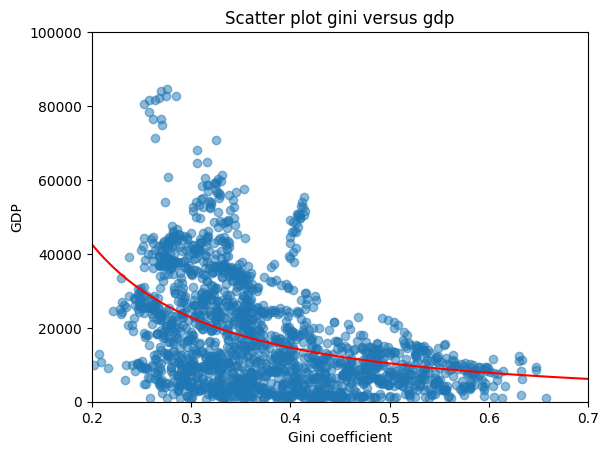

In [114]:
#Scatter chart gini - gdp + logaritmische regressielijn
fig, ax = plt.subplots()
x = df_gini_en_gdp['Gini coefficient']
y = df_gini_en_gdp['GDP per capita']
ax.set_xlabel('Gini coefficient')
ax.set_ylabel("GDP")
ax.set_title('Scatter plot gini versus gdp')
plt.scatter(x, y, alpha=0.5)

# lijkt beetje logaritmisch

newX = np.logspace(0, 1, base=.2)  # Makes a nice domain for the fitted curves.
                                   # Goes from 10^0 to 10^1
                                   # This avoids the sorting and the swarm of lines.

from scipy.optimize import curve_fit
def myExpFunc(x, a, b):
    return a * np.power(x, b)
popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-')
plt.xlim([0.2, 0.7])
plt.ylim([0, 100000])

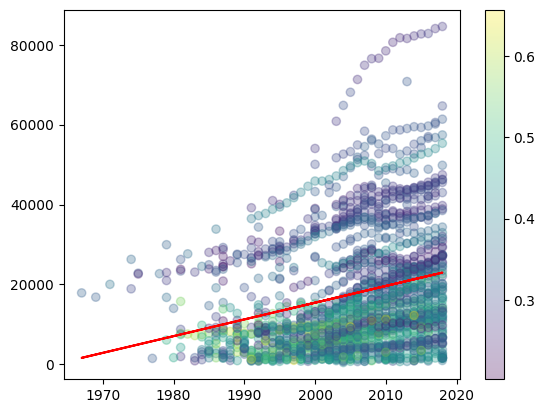

In [115]:
# Gini in kleur en gdp op de y-as met de datum (year) op de x-as
x = df_gini_en_gdp['Year']
y = df_gini_en_gdp['GDP per capita']
colors = df_gini_en_gdp['Gini coefficient']

plt.scatter(x, y, c=colors, alpha=0.3,
            cmap='viridis')
plt.colorbar(); 

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))

plt.plot(x, mymodel, c='r')

In voorgaande grafiek kan je zien dat de 'gele' stukken te vinden zijn onderin de grafiek. Dit betekent dat bij een lage GDP vaker een hogere gini index bestaat.

In [116]:
# Correlatie coefficient berekenen
y = df_gini_en_gdp['Gini coefficient']
x = df_gini_en_gdp['GDP per capita']
r = np.corrcoef(x, y)
display(r)

#r is correlatiematrix
#Pearson correlation coefficient is -.4323; geen hele sterke correlatie
#De correlatie is negatief, dus als GDP omhoog, gaat gini omlaag (zoals ook in de eerste scatterplot te zien)

array([[ 1.        , -0.43225807],
       [-0.43225807,  1.        ]])

In [ ]:
#Is dit per land verschillend?
#Er zijn 1810 landen, teveel om te plotten, check coefficenten
coef_dic = {}
#alleen landen met minimaal 20 datapunten om een goed beeld te krijgen
for country in df_gini_en_gdp['Country']:
  if len(df_gini_en_gdp[df_gini_en_gdp['Country'] == country]) >= 20:
    x = df_gini_en_gdp[df_gini_en_gdp['Country'] == country]['Gini coefficient']
    y = df_gini_en_gdp[df_gini_en_gdp['Country'] == country]['GDP per capita']
    r = np.corrcoef(x, y)
    coef_dic[country] = r[0][1]

#verwijder nan (opgetreden als er binnen één lijst geen verschil in de data zit)
import math
coef_dic = {key: value for (key, value) in coef_dic.items() if not math.isnan(value)}

display(coef_dic)

<Axes: >

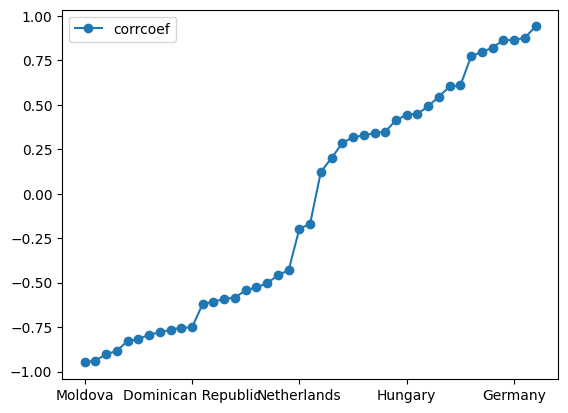

In [118]:
#sorteer de correlatiecoefficienten
#sorted werkt op de één of de andere manier niet...
# sorted_list = sorted(coef_dic.items(), key = lambda item: item[1])

#dan eerst een dataframe van maken:
coef_df = pd.DataFrame.from_dict(coef_dic,orient='index',columns=['corrcoef'])
#en sorteren
coef_df.sort_values(by=['corrcoef'],inplace=True)
coef_df.plot(marker='o')

Kortom, per land een enorm verschil in correlatie coefficent

In [119]:
#alleen landen met minimaal 25 datapunten om te Correlatie te berekenen en te plotten
coef_dic25 = {}
for country in df_gini_en_gdp['Country']:
  if len(df_gini_en_gdp[df_gini_en_gdp['Country'] == country]) >= 25:
    x = df_gini_en_gdp[df_gini_en_gdp['Country'] == country]['Gini coefficient']
    y = df_gini_en_gdp[df_gini_en_gdp['Country'] == country]['GDP per capita']
    r = np.corrcoef(x, y)
    coef_dic25[country] = r[0][1]

#verwijder nan (opgetreden als er binnen één lijst geen verschil in de data zit)
import math
coef_dic25 = {key: value for (key, value) in coef_dic25.items() if not math.isnan(value)}

display(coef_dic25)

{'Brazil': -0.8181074748109122,
 'Costa Rica': 0.4915607211559643,
 'Germany': 0.8639346883658986,
 'Honduras': -0.6076763726442278,
 'Hungary': 0.4444049822568761,
 'Indonesia': 0.8634457157372435,
 'Panama': -0.7643519290318848,
 'Poland': 0.3405936392828835,
 'Romania': 0.32712877348584835,
 'United Kingdom': 0.3488130946571084,
 'United States': 0.8770625558705308}

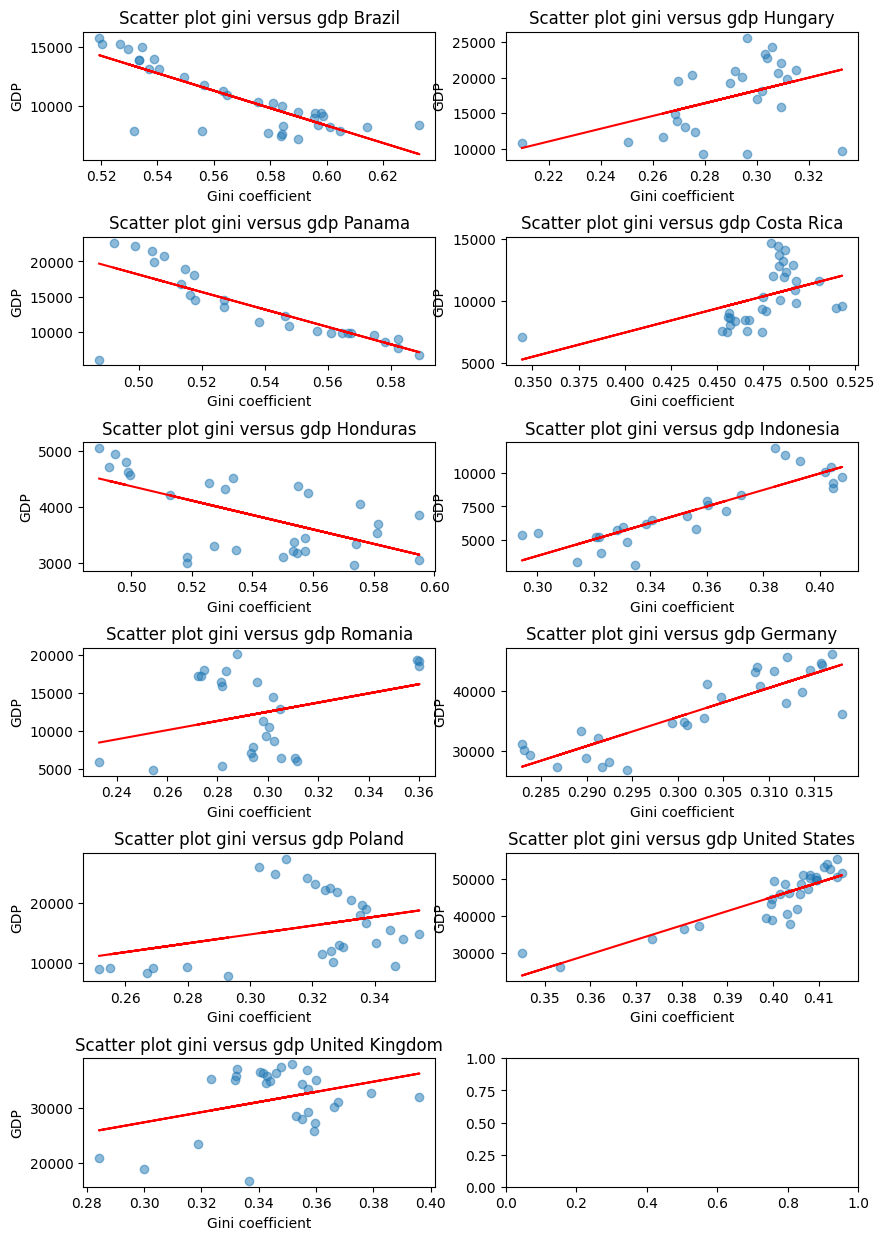

In [120]:
#dan eerst een dataframe van maken:
coef_df25 = pd.DataFrame.from_dict(coef_dic25,orient='index',columns=['corrcoef'])
#en sorteren
coef_df25.sort_values(by=['corrcoef'],inplace=True)

#Scatter chart gini - gdp + regressielijn per land
fig, ax = plt.subplots(6,2)
fig.set_size_inches(10,15)
plt.subplots_adjust( hspace=.6)
i=0
j=0
for country in coef_df25.index:
  x = df_gini_en_gdp[df_gini_en_gdp['Country'] == country]['Gini coefficient']
  y = df_gini_en_gdp[df_gini_en_gdp['Country'] == country]['GDP per capita']
  ax[i,j].set_xlabel('Gini coefficient')
  ax[i,j].set_ylabel("GDP")
  ax[i,j].set_title('Scatter plot gini versus gdp ' + country)
  ax[i,j].scatter(x, y, alpha=0.5)

  slope, intercept, r, p, std_err = stats.linregress(x, y)
  def myfunc(x):
    return slope * x + intercept
  mymodel = list(map(myfunc, x))
  ax[i,j].plot(x, mymodel, c='r')
  i+=1
  if (i%6==0):
    j+=1
    i=0

We zien drie negatieve correlaties en 8 positieve.
Bij de negatieve, zit de gini index continu tussen de 0.5 en 0.6.
Bij de positieve, zit de gini index continu (ruim) onder de 0.5.
We gaan kijken met meerdere datapunten en gaan de data in twee groepen verdelen (grens zetten we eerste op 0.5 en gaan we varieren).

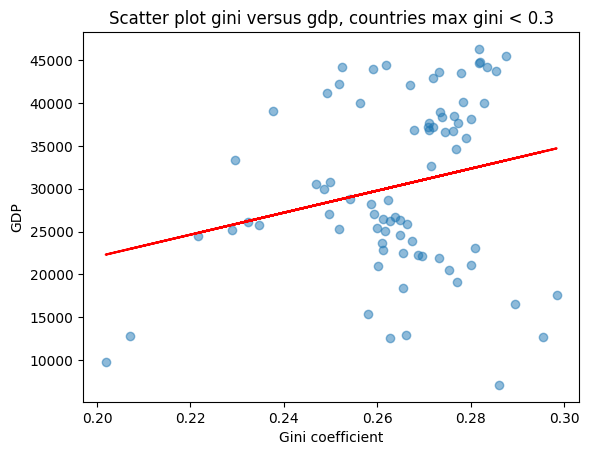

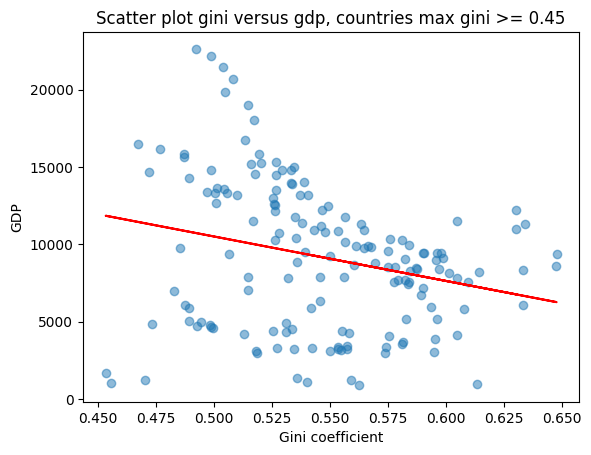

In [121]:
#Om met meer datapunten te vergelijken, nemen we alle landen bij elkaar die het max gini coefficient op .5 (meerdere testen, tot max 0.3) hebben.
#En we vergelijken deze met een groep die de min gini coefficient op .45 hebben
grouped = df_gini_en_gdp.groupby('Country')
max_gini = grouped["Gini coefficient"].max()
min_gini = grouped["Gini coefficient"].min()

countrylistsmallgini = [country for country in max_gini.index if max_gini[country] < 0.3]
countrylistlargegini = [country for country in min_gini.index if min_gini[country] >= 0.45]
df_gini_en_gdp_small = df_gini_en_gdp[df_gini_en_gdp['Country'].isin(countrylistsmallgini)]
df_gini_en_gdp_large = df_gini_en_gdp[df_gini_en_gdp['Country'].isin(countrylistlargegini)]

#Per groep een scatterplot maken en correlatiecoefficient berekenen
#Scatter chart gini - gdp + lineaire regressielijn small
fig, ax = plt.subplots()
x =  df_gini_en_gdp_small['Gini coefficient']
y = df_gini_en_gdp_small['GDP per capita']
ax.set_xlabel('Gini coefficient')
ax.set_ylabel("GDP")
ax.set_title('Scatter plot gini versus gdp, countries max gini < 0.3')
plt.scatter(x, y, alpha=0.5)

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))

plt.plot(x, mymodel, c='r')

#Scatter chart gini - gdp + lineaire regressielijn large
fig, ax = plt.subplots()
x =  df_gini_en_gdp_large['Gini coefficient']
y = df_gini_en_gdp_large['GDP per capita']
ax.set_xlabel('Gini coefficient')
ax.set_ylabel("GDP")
ax.set_title('Scatter plot gini versus gdp, countries max gini >= 0.45')
plt.scatter(x, y, alpha=0.5)

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))

plt.plot(x, mymodel, c='r')

We vergelijken nu wel met beduidend minder datapunten. Wel valt op dat bij een hogere gini coefficient (meer ongelijkheid) de GDP in de lagere waarden valt (en de regressiecoefficient negatief is). En dat bij een lagere gini (max onder .3 per land) de GDP in de hogere waarden valt (en de regressiecoefficent positief is).

In [124]:
# Correlatie coefficient berekenen per lage gini landen en bij de hogere:
x =  df_gini_en_gdp_large['Gini coefficient']
y = df_gini_en_gdp_large['GDP per capita']
r = np.corrcoef(x, y)
display(r)

x =  df_gini_en_gdp_small['Gini coefficient']
y = df_gini_en_gdp_small['GDP per capita']
r = np.corrcoef(x, y)
display(r)

array([[1.        , 0.12473508],
       [0.12473508, 1.        ]])

array([[ 1.        , -0.33708834],
       [-0.33708834,  1.        ]])

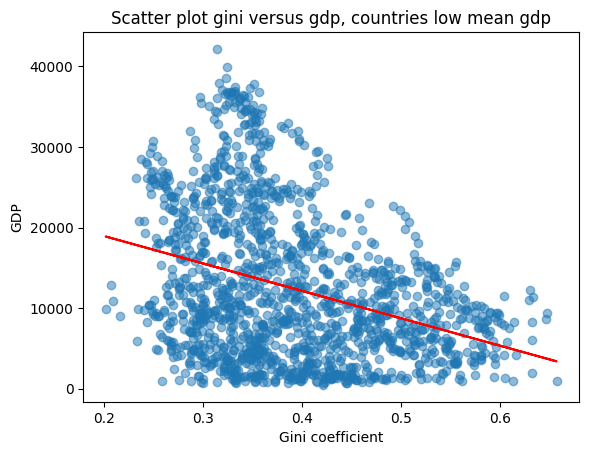

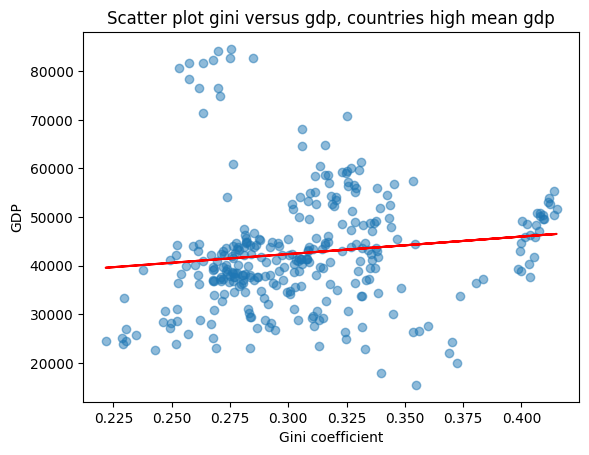

In [122]:
#We gaan dus ook eens splitsen in GDP, mean <= 35000 en mean > 35000
grouped = df_gini_en_gdp.groupby('Country')
maean_gdp = grouped["GDP per capita"].mean()

# newlist = [x for x in fruits if "a" in x]
countrylistsmallgdp = [country for country in maean_gdp.index if maean_gdp[country] <= 35000]
countrylistlargegdp = [country for country in maean_gdp.index if maean_gdp[country] > 35000]
df_gini_en_gdp_small = df_gini_en_gdp[df_gini_en_gdp['Country'].isin(countrylistsmallgdp)]
df_gini_en_gdp_large = df_gini_en_gdp[df_gini_en_gdp['Country'].isin(countrylistlargegdp)]

#Per groep een scatterplot maken en correlatiecoefficient berekenen
#Scatter chart gini - gdp + lineaire regressielijn small
fig, ax = plt.subplots()
x =  df_gini_en_gdp_small['Gini coefficient']
y = df_gini_en_gdp_small['GDP per capita']
ax.set_xlabel('Gini coefficient')
ax.set_ylabel("GDP")
ax.set_title('Scatter plot gini versus gdp, countries low mean gdp')
plt.scatter(x, y, alpha=0.5)

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))

plt.plot(x, mymodel, c='r')

#Scatter chart gini - gdp + lineaire regressielijn large
fig, ax = plt.subplots()
x =  df_gini_en_gdp_large['Gini coefficient']
y = df_gini_en_gdp_large['GDP per capita']
ax.set_xlabel('Gini coefficient')
ax.set_ylabel("GDP")
ax.set_title('Scatter plot gini versus gdp, countries high mean gdp')
plt.scatter(x, y, alpha=0.5)

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))

plt.plot(x, mymodel, c='r')

Ook hier is dezelfde conclusie te trekken:
Bij de hogre GDP's (landen) is de gini lager en is er een positiefe coefficient.
Bij de lagere GDP's (landen) is de gini hoger en is er een negatieve coefficent.

In [123]:
#Als laatste ook even de standaard deviatie bekijken
df_gini_en_gdp[['Gini coefficient', 'GDP per capita']].std() 

Gini coefficient        0.090624
GDP per capita      15051.272140
dtype: float64

Er zit een erg groot verschil in de standaardeviatie van de GDP's.